In [ ]:
# On charge les noms des chansons

from google.colab import drive
import os

drive.mount('/content/gdrive', force_remount=True)

path = "/content/gdrive/My Drive/DSD100_2/Mixtures/Dev/"

dirs = os.listdir(path)

path2 = "/content/gdrive/My Drive/DSD100_2/Mixtures/Test/"

dirs2 = os.listdir(path2)

Mounted at /content/gdrive


In [ ]:
from random import randrange
import tensorflow as tf
import numpy as np
import librosa
import scipy.signal as signal

class DataGenerator(tf.keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, batch_size=32, taille = 10, seuil_VI = 0.55, sampl_rate = 11025):
        'Initialization'
        #self.dim = dim
        self.batch_size = batch_size
        #self.labels = labels
        #self.list_IDs = list_IDs
        #self.n_channels = n_channels
        #self.n_classes = n_classes
        #self.shuffle = shuffle
        #self.on_epoch_end()
        self.taille = taille
        self.seuil_VI = seuil_VI
        self.sampl_rate = sampl_rate

    def __len__(self):
    #    'Denotes the number of batches per epoch'
    #    return int(np.floor(len(self.list_IDs) / self.batch_size))
        return 400

    def __getitem__(self, arg_au_pif):
        'Generate one batch of data'
        # Generate indexes of the batch
        #indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        morceau = randrange(50)

        # Generate data
        X, y = self.__data_generation(morceau)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
    #    self.indexes = np.arange(len(self.list_IDs))
    #    if self.shuffle == True:
    #        np.random.shuffle(self.indexes)
        pass

    def __data_generation(self, morceau):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, 513, self.taille+1))
        Y = np.empty((self.batch_size, 513))

        # Generate data
        mixture = "/content/gdrive/My Drive/DSD100_2/Mixtures/Dev/" + dirs[morceau] + '/mixture.wav'

        audio_mixture, fe = librosa.load(path = mixture, sr = self.sampl_rate)

        vocal = "/content/gdrive/My Drive/DSD100_2/Sources/Dev/" + dirs[morceau] + '/vocals.wav'

        audio_vocal, fe = librosa.load(path = vocal, sr = self.sampl_rate)

        f, t, Zxx1 = signal.stft(audio_mixture, fs=self.sampl_rate, nperseg=1024)
        f, t, Zxx2 = signal.stft(audio_vocal, fs=self.sampl_rate, nperseg=1024)

        a, b = Zxx1.shape

        Zxx1_norm = 10*np.log((np.abs(Zxx1)**2+1e-12)/1e-12)
        Zxx1_norm = Zxx1_norm/np.max(Zxx1_norm)

        Zxx2_abs = 10*np.log((np.abs(Zxx2)**2+1e-12)/1e-12)

        seuil = np.max(Zxx2_abs)*self.seuil_VI

        matrice_01 = Zxx2_abs * 0
        matrice_01[Zxx2_abs>seuil] = 1

        for i in range(self.batch_size):

            fenetre = randrange(b-self.taille)

            Zxx1_i = Zxx1_norm[:,0+fenetre:self.taille+1+fenetre]

            X[i,:,:] = Zxx1_i

            Y[i,:] = matrice_01[:,fenetre+int(self.taille/2)]

        return X, Y

In [ ]:
class DataGenerator2(tf.keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, batch_size=32, taille = 10, seuil_VI = 0.55, sampl_rate = 11025):
        'Initialization'
        #self.dim = dim
        self.batch_size = batch_size
        #self.labels = labels
        #self.list_IDs = list_IDs
        #self.n_channels = n_channels
        #self.n_classes = n_classes
        #self.shuffle = shuffle
        #self.on_epoch_end()
        self.taille = taille
        self.seuil_VI = seuil_VI
        self.sampl_rate = sampl_rate

    def __len__(self):
    #    'Denotes the number of batches per epoch'
    #    return int(np.floor(len(self.list_IDs) / self.batch_size))
        return 100

    def __getitem__(self, arg_au_pif):
        'Generate one batch of data'
        # Generate indexes of the batch
        #indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        morceau = randrange(50)

        # Generate data
        X, y = self.__data_generation(morceau)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
    #    self.indexes = np.arange(len(self.list_IDs))
    #    if self.shuffle == True:
    #        np.random.shuffle(self.indexes)
        pass

    def __data_generation(self, morceau):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, 513, self.taille+1))
        Y = np.empty((self.batch_size, 513))

        # Generate data
        mixture = "/content/gdrive/My Drive/DSD100_2/Mixtures/Test/" + dirs2[morceau] + '/mixture.wav'

        audio_mixture, fe = librosa.load(path = mixture, sr = self.sampl_rate)

        vocal = "/content/gdrive/My Drive/DSD100_2/Sources/Test/" + dirs2[morceau] + '/vocals.wav'

        audio_vocal, fe = librosa.load(path = vocal, sr = self.sampl_rate)

        f, t, Zxx1 = signal.stft(audio_mixture, fs=self.sampl_rate, nperseg=1024)
        f, t, Zxx2 = signal.stft(audio_vocal, fs=self.sampl_rate, nperseg=1024)

        a, b = Zxx1.shape

        Zxx1_norm = 10*np.log((np.abs(Zxx1)**2+1e-12)/1e-12)
        Zxx1_norm = Zxx1_norm/np.max(Zxx1_norm)

        Zxx2_abs = 10*np.log((np.abs(Zxx2)**2+1e-12)/1e-12)

        seuil = np.max(Zxx2_abs)*self.seuil_VI

        matrice_01 = Zxx2_abs * 0
        matrice_01[Zxx2_abs>seuil] = 1

        for i in range(self.batch_size):

            fenetre = randrange(b-self.taille)

            Zxx1_i = Zxx1_norm[:,0+fenetre:self.taille+1+fenetre]

            X[i,:,:] = Zxx1_i

            Y[i,:] = matrice_01[:,fenetre+int(self.taille/2)]

        return X, Y

In [ ]:
# Custom MSE pour forcer la prédiction des pixels 1, attention, réduit la bonne prédiction des pixels 0, équilibre à trouver

import keras
from keras import backend as K

def custom_mse(y_true, y_pred):
    mask1 = y_true
    mask2 = 1 - y_true
    lambda1 = 3 # (y_true = 1 et y_pred = 0) renforce l'erreur 
    lambda2 = 1
    return K.mean(K.square(y_pred - y_true)*mask1*lambda1 + K.square(y_pred - y_true)*mask2*lambda2, axis=-1)

In [ ]:
def recall(y_true, y_pred):
    TP = K.sum(y_true * K.round(y_pred))
    FN = K.sum(y_true* K.round(1-y_pred))
    if TP + FN == 0.0:
      recall = 0.0
    else:
      recall = TP / (TP + FN)
    return recall

def precision(y_true, y_pred):
    TP = K.sum(y_true * K.round(y_pred))
    FP = K.sum((1-y_true)* K.round(y_pred))
    if TP + FP == 0.0:
      precision = 0.0
    else:
      precision = TP / (TP + FP)
    return precision

def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    if p + r == 0.0:
      return 0.0
    else:
      return 2*p*r/(p+r)

def accuracy2(y_true, y_pred):
    #return K.mean(K.equal(K.argmax(y_true, axis=-1), K.argmax(y_pred, axis=-1))) # formule si accuracy
    return K.mean(K.equal(y_true, K.round(y_pred))) # formule si BinaryAccuracy, cf https://datascience.stackexchange.com/questions/14415/how-does-keras-calculate-accuracy


def a1(y_true, y_pred):
    somme = K.sum(y_true)
    if somme == 0 :
      return 0.0
    else:
      return K.sum(y_true * K.round(y_pred)) / somme

def a2(y_true, y_pred):
    return K.sum((1-y_true) * (1-K.round(y_pred))) / K.sum(1-y_true)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import activations
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, Reshape, UpSampling2D, Cropping2D
from tensorflow.keras.optimizers import SGD
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Deconv2D

##################################################
################## VI ############################
##################################################

model2 = tf.keras.Sequential()

taille = 10

# Modèle mixte
model2.add(Conv2D(32, (3,3), padding='same', input_shape=(513,taille+1,1)))
model2.add(Activation('relu'))
model2.add(Conv2D(16, (3,3), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(64, (3,3), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(16, (3,3), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,1)))
model2.add(Dropout(0.5))
model2.add(Flatten())
model2.add(Dense(513))
model2.add(Activation('sigmoid'))


opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
#opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.8)
model2.compile(loss=custom_mse, optimizer=opt, metrics=['BinaryAccuracy',a1,a2])#tf.keras.losses.MeanSquaredError()

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 513, 11, 32)       320       
                                                                 
 activation (Activation)     (None, 513, 11, 32)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 513, 11, 16)       4624      
                                                                 
 activation_1 (Activation)   (None, 513, 11, 16)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 256, 5, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 256, 5, 16)        0         
                                                        

In [ ]:
training_generator = DataGenerator()

validation_generator = DataGenerator2()

In [ ]:
epok = 40

training_history = model2.fit_generator(generator=training_generator, validation_data=validation_generator, epochs = epok)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/40
400/400 [==============================] - 312s 752ms/step - loss: 0.2295 - binary_accuracy: 0.8424 - a1: 0.1765 - a2: 0.9354 - val_loss: 0.2468 - val_binary_accuracy: 0.8182 - val_a1: 0.2166 - val_a2: 0.9228
Epoch 2/40
400/400 [==============================] - 135s 337ms/step - loss: 0.2119 - binary_accuracy: 0.8275 - a1: 0.2865 - a2: 0.8974 - val_loss: 0.2390 - val_binary_accuracy: 0.8501 - val_a1: 0.1478 - val_a2: 0.9623
Epoch 3/40
400/400 [==============================] - 130s 325ms/step - loss: 0.2031 - binary_accuracy: 0.8127 - a1: 0.3997 - a2: 0.8615 - val_loss: 0.2238 - val_binary_accuracy: 0.7685 - val_a1: 0.5677 - val_a2: 0.7894
Epoch 4/40
400/400 [==============================] - 124s 311ms/step - loss: 0.1970 - binary_accuracy: 0.8161 - a1: 0.4473 - a2: 0.8616 - val_loss: 0.1933 - val_binary_accuracy: 0.8162 - val_a1: 0.5451 - val_a2: 0.8440
Epoch 5/40
400/400 [==============================] - 126s 316ms/step - loss: 0.1906 - binary_accuracy: 0.8195 - a1: 0.4

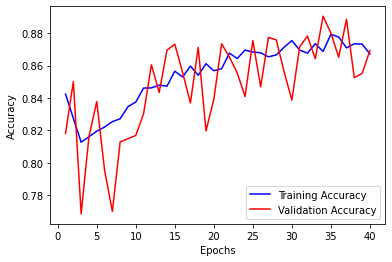

In [ ]:
import matplotlib.pyplot as plt

train_acc = training_history.history['binary_accuracy']
val_acc = training_history.history['val_binary_accuracy']

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.plot(np.arange(1,epok +1,1),training_history.history['binary_accuracy'], label='Training Accuracy', color='blue')
plt.plot(np.arange(1,epok +1,1),training_history.history['val_binary_accuracy'], label='Validation Accuracy', color='red')

plt.legend()

plt.show()

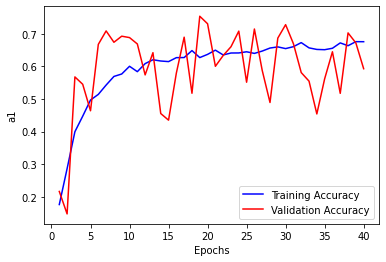

In [ ]:
plt.xlabel('Epochs')
plt.ylabel('a1')

plt.plot(np.arange(1,epok +1,1),training_history.history['a1'], label='Training Accuracy', color='blue')
plt.plot(np.arange(1,epok +1,1),training_history.history['val_a1'], label='Validation Accuracy', color='red')

plt.legend()

plt.show()

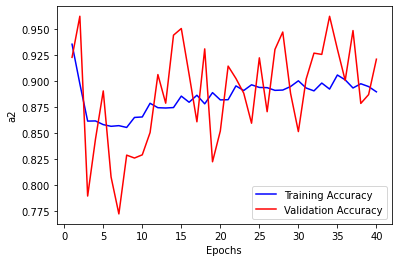

In [ ]:
plt.xlabel('Epochs')
plt.ylabel('a2')

plt.plot(np.arange(1,epok +1,1),training_history.history['a2'], label='Training Accuracy', color='blue')
plt.plot(np.arange(1,epok +1,1),training_history.history['val_a2'], label='Validation Accuracy', color='red')

plt.legend()

plt.show()

In [ ]:
# On réalise une prédiction sur un morceau du training/validation set
from IPython.display import Audio

sampl_rate = 11025

i=13
#mixture = "/content/gdrive/My Drive/DSD100_2/Mixtures/Dev/" + dirs[i] + '/mixture.wav' # si training
mixture = "/content/gdrive/My Drive/DSD100_2/Mixtures/Test/" + dirs2[i] + '/mixture.wav' # si validation

audio_mixture, fe = librosa.load(path = mixture, sr = sampl_rate)
    
#vocal = "/content/gdrive/My Drive/DSD100_2/Sources/Dev/" + dirs[i] + '/vocals.wav' # si training
vocal = "/content/gdrive/My Drive/DSD100_2/Sources/Test/" + dirs2[i] + '/vocals.wav' # si validation
        
audio_vocal, fe = librosa.load(path = vocal, sr = sampl_rate)

# Passage dans le domaine spectral
debut = 90*sampl_rate
fin = 120*sampl_rate

f, t, Zxx1 = signal.stft(audio_mixture[debut:fin], fs=sampl_rate, nperseg=1024)

# On écoute le mix
signal_reconstruit = signal.istft(Zxx1, fs=sampl_rate)

Audio(np.array(signal_reconstruit)[1,:], rate = sampl_rate)

In [ ]:
from progressbar import ProgressBar

pbar = ProgressBar()

# Normalisation
Zxx1_norm = 10*np.log((np.abs(Zxx1)**2+1e-12)/1e-12)
Zxx1_norm = Zxx1_norm/np.max(Zxx1_norm)

a, b = Zxx1.shape

pred_VI = np.zeros((513,b-taille))

for j in pbar(range(0,b-taille,1)):   
    Zxx1_i_VI = Zxx1_norm[:,0+j:taille+1+j]
    Zxx1_i_VI = Zxx1_i_VI[np.newaxis,:,:,np.newaxis]

    prediction_VI = model2.predict(Zxx1_i_VI)
    prediction_VI_r = np.round(prediction_VI)

    pred_VI[:,j] = Zxx1[:,int(taille/2)+j]*prediction_VI_r[0,:]

pred_VI = np.concatenate((np.zeros((513,int(taille/2))),pred_VI,np.zeros((513,int(taille/2)))),axis=1)

N/A% (0 of 637) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
100% (637 of 637) |######################| Elapsed Time: 0:00:26 Time:  0:00:26


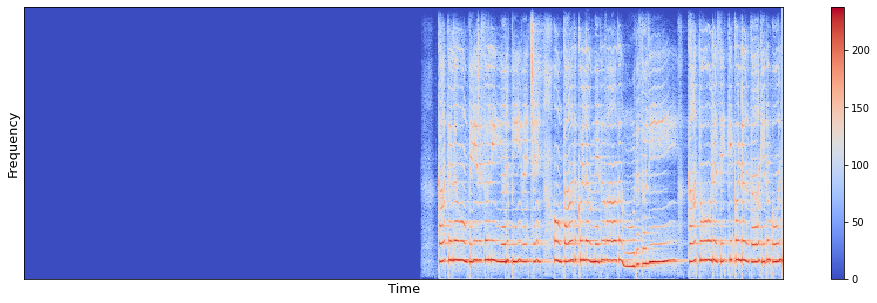

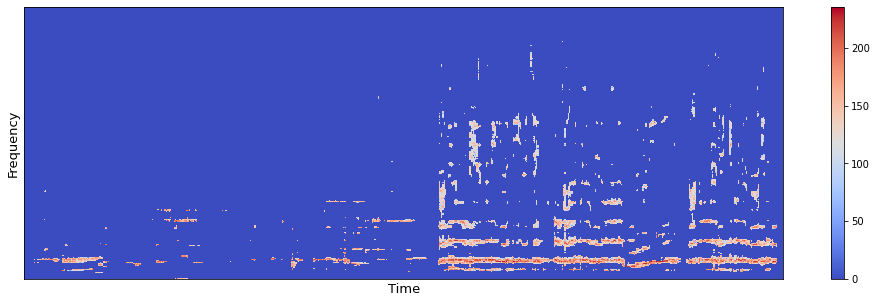

In [ ]:
# On affiche le vocal
import librosa.display

f, t, Zxx2 = signal.stft(audio_vocal[debut:fin], fs=sampl_rate, nperseg=1024)

plt.figure(figsize=(17,5))
librosa.display.specshow(10*np.log((np.abs(Zxx2)**2+1e-12)/1e-12), cmap='coolwarm')
plt.xlabel ('Time', fontsize=13)
plt.ylabel ('Frequency', fontsize=13)
plt.colorbar()
plt.show();


# On affiche le masque * mix
plt.figure(figsize=(17,5))
librosa.display.specshow(10*np.log((np.abs(pred_VI)**2+1e-12)/1e-12), cmap='coolwarm')
plt.xlabel ('Time', fontsize=13)
plt.ylabel ('Frequency', fontsize=13)
plt.colorbar()
plt.show();

In [ ]:
# Ecoute canal vocal
signal_reconstruit = signal.istft(Zxx2, fs=sampl_rate)

Audio(np.array(signal_reconstruit)[1,:], rate = sampl_rate)

In [ ]:
# Ecoute vocal après calcul
signal_reconstruit = signal.istft(pred_VI, fs=sampl_rate)

Audio(np.array(signal_reconstruit)[1,:], rate = sampl_rate)